In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('flights_NY.csv')
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419


## Задания для исследования

### 1. В каких колонках есть пропущенные значения? Сколько строк, в которых есть хотя бы одно пропущенное значение? Есть ли какая-то особенность в тех рейсах, в которых есть пропущенные значения? Удалите строки, в которых есть хотя бы одно пропущенное значение из дальнейшего анализа.

In [3]:
na_matrix = df.isna().values
na_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False]])

In [4]:
df.columns[na_matrix.any(axis=0)]

Index(['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum',
       'air_time'],
      dtype='object')

Пропущенные значения есть в колонках: ['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum',
       'air_time']

In [5]:
na_matrix.any(axis=1).sum()

9430

В 9430 строках есть хотя бы одно пропущенное значение. Это примерно 2.8% от числа всех строк.

Наблюдается закономерность, что в основном пропущены значения связанные с временем. Причем как правило пропущены сразу все временные признаки. Такие строки не представляют интереса в дальнейшем исследовании, удалим их из выборки.

In [6]:
df = df.dropna()
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


### 2. Постройте в одних осях нормированные гистограммы времени задержки вылета и прилета. Ограничьте диапазон построения гистограмм, чтобы избавиться от выбросов, и опишите характер выбросов (количество и значения). Есть ли другие особенности в полученных распределениях?

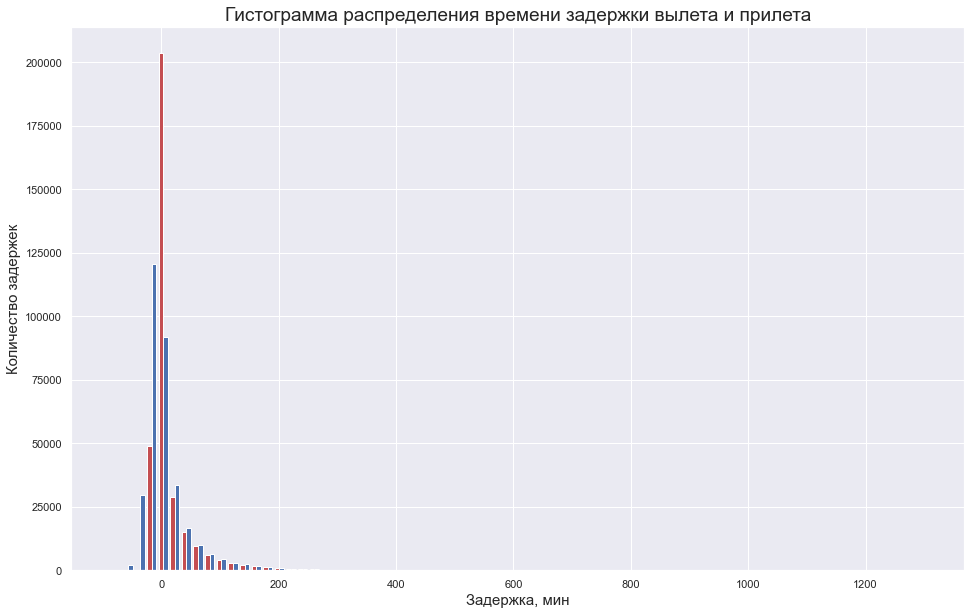

In [7]:
fig = plt.figure(figsize=(16, 10))
plt.hist([df['dep_delay'], df['arr_delay']], color=['r','b'], bins=70)
plt.title('Гистограмма распределения времени задержки вылета и прилета', fontsize=19)
plt.xlabel('Задержка, мин', fontsize=15)
plt.ylabel('Количество задержек', fontsize=15)
plt.show()

In [8]:
(df['dep_delay'] > 400).sum()

132

In [9]:
(df['arr_delay'] > 400).sum()

127

In [10]:
(df['dep_delay'] > 600).sum()

39

In [11]:
(df['arr_delay'] > 600).sum()

39

In [12]:
(df['dep_delay'] > 1000).sum()

5

In [13]:
(df['arr_delay'] > 1000).sum()

4

В данных задержек вылета и прилета присутствуют аномальные значения. Конечно бывают задержки рейсов и на 10, и на 16 часов, но это можно считать выбросами, и исключить эти данные из гистограмм, чтобы лучше посмотреть на распределение типичных задержек.

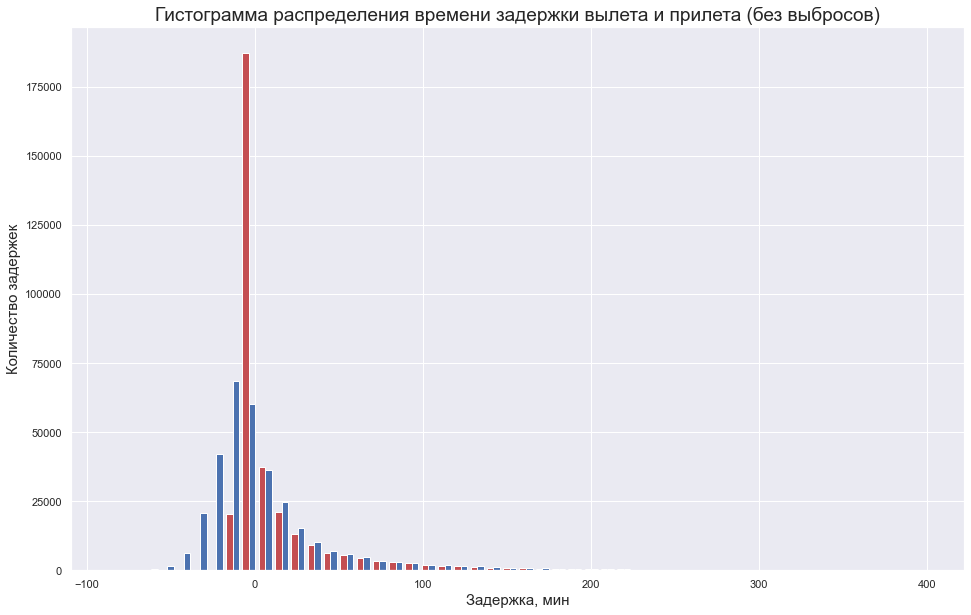

In [14]:
fig = plt.figure(figsize=(16, 10))
plt.hist([df['dep_delay'][df['dep_delay'] < 400], df['arr_delay'][df['arr_delay'] < 400]], color=['r','b'], bins=50)
plt.title('Гистограмма распределения времени задержки вылета и прилета (без выбросов)', fontsize=19)
plt.xlabel('Задержка, мин', fontsize=15)
plt.ylabel('Количество задержек', fontsize=15)
plt.show()

Из интересных особенностей можно заметить, что раньше времени обычно происходит прилет. Так же видно, что очень много вылетов, которые были сделаны вовремя или чуть-чуть раньше назначенного времени.

### 3. Оцените среднее значение, медиану и величину стандартного отклонения для времени задержки вылета и времени задержки прилета.

In [17]:
# departure delay statistics
np.mean(df['dep_delay'].values), np.median(df['dep_delay'].values), np.std(df['dep_delay'].values)

(12.555155706805643, -2.0, 40.06562638777113)

In [18]:
# arrival delay statistics
np.mean(df['arr_delay'].values), np.median(df['arr_delay'].values), np.std(df['arr_delay'].values)

(6.89537675731489, -5.0, 44.633223515654244)

### 6. Сравните между собой аэропорты вылета (JFK, LGA, EWR) с точки зрения статистики задержек вылетов. Являются ли различия статистически значимыми?

In [19]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


In [20]:
df['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [21]:
# JFK statistics
np.mean(df['dep_delay'][df['origin'] == 'JFK']), np.median(df['dep_delay'][df['origin'] == 'JFK']), np.std(df['dep_delay'][df['origin'] == 'JFK'])

(12.023606743736192, -1.0, 38.8269200290658)

In [22]:
# LGA statistics
np.mean(df['dep_delay'][df['origin'] == 'LGA']), np.median(df['dep_delay'][df['origin'] == 'LGA']), np.std(df['dep_delay'][df['origin'] == 'LGA'])

(10.286582954320744, -3.0, 39.9111010828904)

In [23]:
# EWR statistics
np.mean(df['dep_delay'][df['origin'] == 'EWR']), np.median(df['dep_delay'][df['origin'] == 'EWR']), np.std(df['dep_delay'][df['origin'] == 'EWR'])

(15.009109769737123, -1.0, 41.185032237376284)

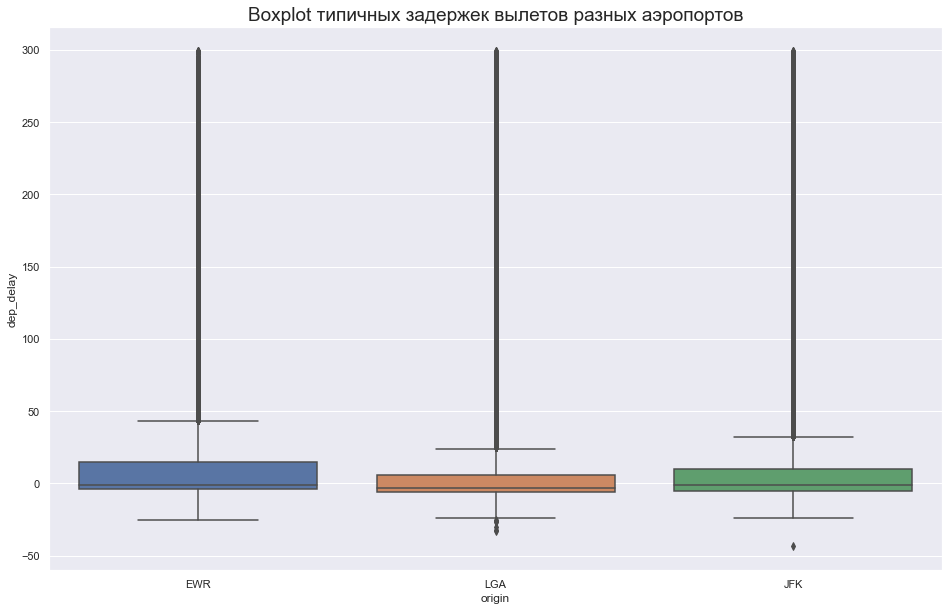

In [24]:
fig = plt.figure(figsize=(16, 10))
sns.boxplot(data=df[df['dep_delay'] < 300], x='origin', y='dep_delay')
plt.title('Boxplot типичных задержек вылетов разных аэропортов', fontsize=19)
plt.show()

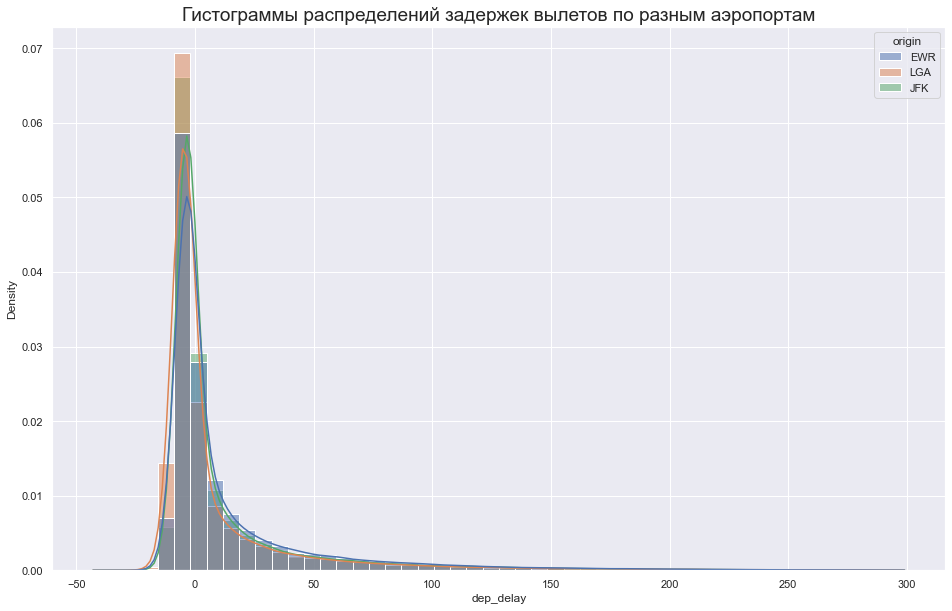

In [25]:
fig = plt.figure(figsize=(16, 10))
sns.histplot(data=df[df['dep_delay'] < 300], x='dep_delay', hue='origin', bins=50, stat='density', common_norm=False, kde=True)
plt.title('Гистограммы распределений задержек вылетов по разным аэропортам', fontsize=19)
plt.show()

С точки зрения задержек вылетов самым лучшим аэропортом оказался LGA. Отличия LGA от EWR и JFK являются статистически значимыми.

### 9. Постройте график среднего времени задержки в зависимости от часа вылета. На отдельном графике постройте долю рейсов, для которых задержка > 0, в зависимости от часа вылета. Опишите словами наблюдаемую картину.

In [26]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


In [27]:
dep_time = df['dep_time'].values.astype(int)
dep_time

array([ 517,  533,  542, ..., 2241, 2307, 2349])

In [28]:
dep_hour = []
for time in dep_time:
    s = str(time)
    if len(s) == 3 or len(s) == 4:
        dep_hour.append(int(s[:-2]))
    else:
        dep_hour.append(-1)
dep_hour = np.array(dep_hour)

In [29]:
np.unique(dep_hour)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [30]:
mean_dep_delay_by_hour = []
for hour in range(1, 25):
    mean_dep_delay_by_hour.append(np.mean(df['dep_delay'][dep_hour == hour]))
mean_dep_delay_by_hour

[206.7556561085973,
 236.25396825396825,
 304.72727272727275,
 -5.554098360655738,
 -4.356293222683264,
 -1.52181022672029,
 0.2147227801391938,
 1.0923123601471536,
 4.234112646121147,
 5.511072297423741,
 5.613271900430828,
 7.517348976535197,
 9.363906203621253,
 8.051828969304697,
 10.5933136589878,
 13.557249505306709,
 16.655746630972367,
 18.474665547942013,
 21.31020079512858,
 28.08759396160775,
 41.84414513468939,
 67.9586156381615,
 96.63842024539878,
 64.86206896551724]

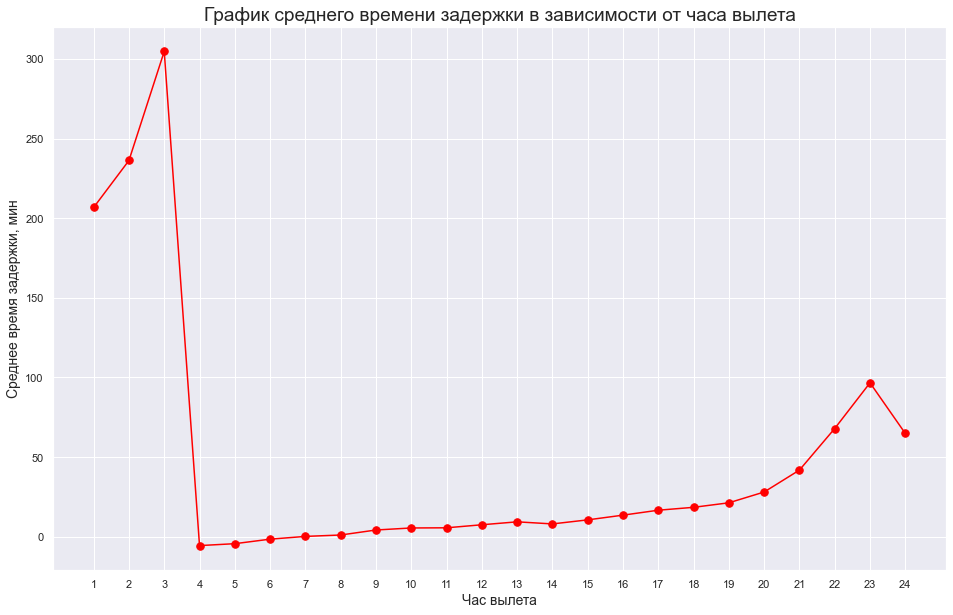

In [31]:
fig = plt.figure(figsize=(16, 10))
plt.plot(np.arange(1, 25), mean_dep_delay_by_hour, color='red', marker='.', ms=15)
plt.title('График среднего времени задержки в зависимости от часа вылета', fontsize=19)
plt.xlabel('Час вылета', fontsize=14)
plt.ylabel('Среднее время задержки, мин', fontsize=14)
plt.xticks(np.arange(1, 25))
plt.show()

In [32]:
positive_delay_ratio_by_hour = []
for hour in range(1, 25):
    ratio = (df['dep_delay'][dep_hour == hour] > 0).sum() / (dep_hour == hour).sum()
    positive_delay_ratio_by_hour.append(ratio)
positive_delay_ratio_by_hour

[1.0,
 1.0,
 1.0,
 0.0,
 0.05062240663900415,
 0.18181818181818182,
 0.20734270633845578,
 0.234118405582736,
 0.2914984059511158,
 0.3113342898134864,
 0.2867400670177118,
 0.35197204193709436,
 0.41775007420599586,
 0.36844169853878594,
 0.4614808615601462,
 0.4761647778377406,
 0.5211216479876583,
 0.481983871719573,
 0.5304715414423029,
 0.5605392309125924,
 0.6783947223749313,
 0.7502288958066288,
 0.781441717791411,
 1.0]

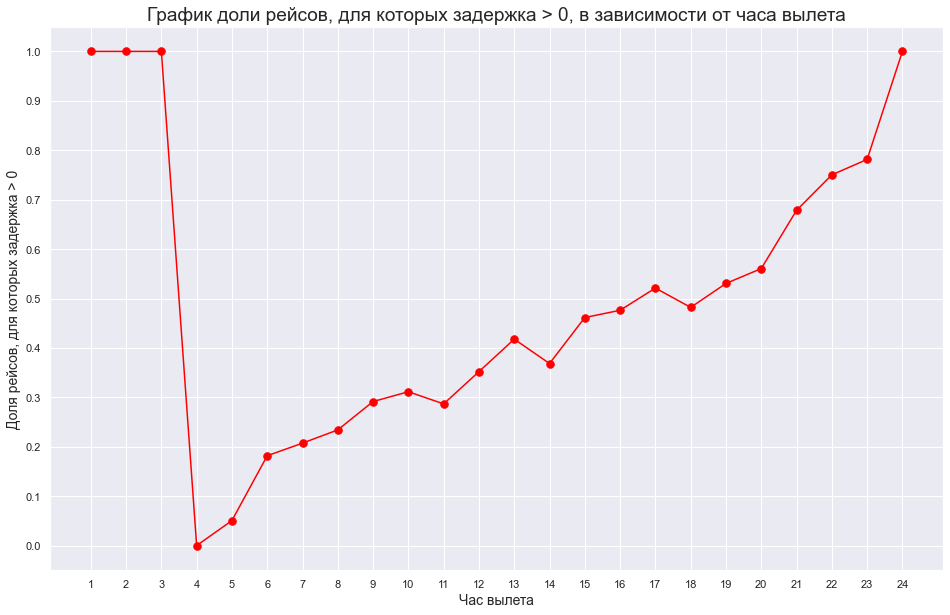

In [33]:
fig = plt.figure(figsize=(16, 10))
plt.plot(np.arange(1, 25), positive_delay_ratio_by_hour, color='red', marker='.', ms=15)
plt.title('График доли рейсов, для которых задержка > 0, в зависимости от часа вылета', fontsize=19)
plt.xlabel('Час вылета', fontsize=14)
plt.ylabel('Доля рейсов, для которых задержка > 0', fontsize=14)
plt.xticks(np.arange(1, 25))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.show()

По построенным графикам можно видеть, что больше всего рейсов задерживают ночью: с 0 часов до 4 утра. В данной выборке в этом временном диапазоне были задержаны все рейсы, причем самая большая задержка была с часа ночи до 4 утра. В 4 утра не было задержано ни одного рейса, причем все они вылетели с наибольшем средним опережением графика. Далее среднее время задержки и доля задержанных рейсов растут. Так же в данных наблюдается локальный максимум среднего времени задержки в 23 часа, возможно, это вызвано выбросами, так как среднее -- статистика не устойчивая к выбросам.

### 10. Предложите способ разделить авиакомпании на пунктуальные и непунктуальные. Какие авиакомпании в какую группу попадают? Будут ли различаться группы в зависимости от дальности перелета?

In [34]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


In [35]:
df['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [36]:
# mean
df.groupby('carrier').mean().loc[:, ['dep_delay', 'arr_delay', 'distance']]

,dep_delay,arr_delay,distance
carrier,,,
9E,16.439574,7.379669,529.889615
AA,8.569130,0.364291,1343.279870
AS,5.830748,-9.930889,2402.000000
B6,12.967548,9.457973,1069.689615
DL,9.223950,1.644341,1237.979143
EV,19.838929,15.796431,562.865031
F9,20.201175,21.920705,1620.000000
FL,18.605984,20.115906,664.787402
HA,4.900585,-6.915205,4983.000000


In [37]:
# median
df.groupby('carrier').median().loc[:, ['dep_delay', 'arr_delay', 'distance']]

,dep_delay,arr_delay,distance
carrier,,,
9E,-2.0,-7.0,509
AA,-3.0,-9.0,1096
AS,-3.0,-17.0,2402
B6,-1.0,-3.0,1023
DL,-2.0,-8.0,1020
EV,-1.0,-1.0,533
F9,0.0,6.0,1620
FL,1.0,5.0,762
HA,-4.0,-13.0,4983


In [38]:
# std
df.groupby('carrier').std().loc[:, ['dep_delay', 'arr_delay', 'distance']]

,dep_delay,arr_delay,distance
carrier,,,
9E,45.487513,50.086778,320.273580
AA,37.365267,42.516182,639.767314
AS,31.426798,36.482633,0.000000
B6,38.380215,42.842297,703.990549
DL,39.656296,44.402289,660.646279
EV,46.446174,49.861469,287.197483
F9,58.404339,61.645997,0.000000
FL,52.491059,54.087671,160.930718
HA,74.109901,75.129420,0.000000


Чтобы разделить авиакомпании на пунктуальные и непунктуальные можно посчитать статистики задержек вылетов и прилетов для каждой авиакомпании. Так же чтобы оценить связь с дальностью перелета, посчитаем статистики и для этого параметра в разрезе авиакомпании.

Самыми **пунктуальными** авиакомпаниями являются AS, HA и US. Самыми **непунктуальными** авиакомпаниями являются EV, F9, FL, WN и YV. Взаимосвязь пунктуальности с дальностью перелета прослеживается: авиакомпании летающие на дальние рейсы более пунктуальны. 

Можно выделить интересную авиакомпанию HA: одна из самых пунктуальных авиакомпаний, при этом единственная авиакомпания летающая на такое большое расстояние. Так же HA делает рейсы только по одному маршруту и имеет самую большую дисперсию задержек вылета и прилета.